<a href="https://colab.research.google.com/github/Userfound404/Video-transcript-summarizer/blob/main/video_transcript_summarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 91.5 MB/s eta 0:00:00


In [ ]:
!pip install -q youtube_transcript_api

In [ ]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [ ]:
youtube_video = "https://www.youtube.com/watch?v=p3q5zWCw8J4"

In [ ]:
video_id = youtube_video.split("=")[1]

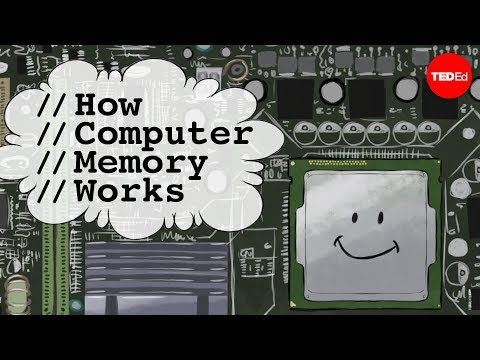

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [ ]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [ ]:
transcript[0:5]

[{'text': 'In many ways, \nour memories make us who we are,',
  'start': 6.879,
  'duration': 3.151},
 {'text': 'helping us remember our past,', 'start': 10.03, 'duration': 2.029},
 {'text': 'learn and retain skills,', 'start': 12.059, 'duration': 1.93},
 {'text': 'and plan for the future.', 'start': 13.989, 'duration': 2.284},
 {'text': 'And for the computers that often act\nas extensions of ourselves,',
  'start': 16.273,
  'duration': 3.643}]

In [ ]:
result = ""
for i in transcript:
    result += ' ' + i['text']
#print(result)
print(len(result))

4089


In [ ]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [ ]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  print("input text \n" + result[start:end])
  out = summarizer(result[start:end])
  out = out[0]
  out = out['summary_text']
  print("Summarized text\n"+out)
  summarized_text.append(out)

print(summarized_text)

input text 
 In many ways, 
our memories make us who we are, helping us remember our past, learn and retain skills, and plan for the future. And for the computers that often act
as extensions of ourselves, memory plays much the same role, whether it's a two-hour movie, a two-word text file, or the instructions for opening either, everything in a computer's memory
takes the form of basic units called bits, or binary digits. Each of these is stored in a memory cell that can switch between two states
for two possible values, 0 and 1. Files and programs consist of millions
of these bits, all processed in 
the central processing unit, or CPU, that acts as the computer's brain. And as the number of bits needing
to be processed grows exponentially, computer designers face 
a constant struggle between size, cost, and speed. Like us, computers have short-term memory
for immediate tasks, and long-term memory 
for more permanent storage. When you run a program, your operating system allocates are

Your max_length is set to 142, but you input_length is only 22. You might consider decreasing max_length manually, e.g. summarizer('...', max_length=11)


Summarized text
 We tend to think of computer memory as stable and permanent, but it degrades fairly quickly . The heat generated from a device and its environment will eventually demagnetize hard drives, degrade the dye in optical media, and cause charge leakage . Scientists are working to exploit the physical properties of materials down to the quantum level in the hopes of making devices faster, smaller, and smaller .
input text 
 more durable. For now, immortality remains out of reach,
for humans and computers alike.
Summarized text
 For now, immortality remains out of reach, for now, for humans and computers alike . More durable.  more durable. more durable . For now.  immortality remains a mystery to humans and machines alike. For now it's not clear whether immortality is possible in the future .
[' Our memories make us who we are, helping us remember our past, learn and retain skills, and plan for the future . Like us, computers have short-term memory for immediate tasks and lon

In [ ]:
str(summarized_text)

'[\' Our memories make us who we are, helping us remember our past, learn and retain skills, and plan for the future . Like us, computers have short-term memory for immediate tasks and long-term storage . As the number of bits needing to be processed grows exponentially, computer designers face a constant struggle between size, cost, and speed .\', " The most common type of RAM is dynamic RAM, or DRAM . Dynamic RAM stores electrical charges, a 0 when there\'s no charge, or a 1 when charged . Static RAM stores charges briefly before they leak away, requiring periodic recharging . But even its low latency is too long for modern CPUs, so there\'s also a small, high-speed internal memory cache made from static RAM .", \' SRAM is the fastest memory in a computer system, but also the most expensive, and takes up three times more space than DRAM . Optical storage media are cheap cheap and removable, but have even slower latencies than magnetic storage media and lower capacity as well . But da

In [ ]:
len(str(summarized_text))

4515